# **Hitarth Sharma**
# **The Spark Foundation GRIPFEB2021**
# **Task-2 : Prediction using Unsupervised ML**
### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 

### Importing the libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the data

In [21]:
data=pd.read_csv("C:/Users/user/Documents/GRIP_Tasks/Iris.csv")
print('shape of this data is', data.shape)
data.head(10)

shape of this data is (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [22]:
data.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
44,45,5.1,3.8,1.9,0.4,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa
132,133,6.4,2.8,5.6,2.2,Iris-virginica
100,101,6.3,3.3,6.0,2.5,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
73,74,6.1,2.8,4.7,1.2,Iris-versicolor
69,70,5.6,2.5,3.9,1.1,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
9,10,4.9,3.1,1.5,0.1,Iris-setosa
130,131,7.4,2.8,6.1,1.9,Iris-virginica


In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [63]:
data1=data.drop(['Id','Species'],axis=1)
print('shape of data1 is',data1.shape)
data1.head(10)

shape of data1 is (150, 4)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### Now we have to find the optimum number of clusters for K Means.

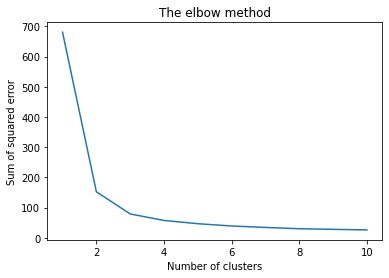

In [57]:
# Finding the optimum number of clusters for k-means classification

x = data1.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
sse = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared error')
plt.show()

from the above graph, the optimum clusters is where the elbow occurs. This is when the sum of squared error(sse) doesn't decrease significantly with every iteration,and the elbow occurs at 3. 
So we choose the number of clusters as '3'.


In [65]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
labels=kmeans.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


### Visualising the clusters

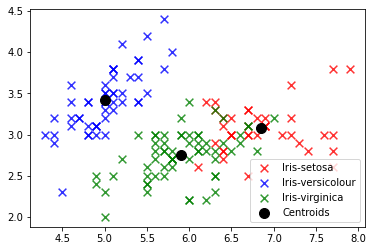

In [62]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 60, c = 'red',marker = 'x', label = 'Iris-setosa',alpha = 0.8)
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 60, c = 'blue',marker = 'x', label = 'Iris-versicolour',alpha = 0.8)
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 60, c = 'green',marker = 'x', label = 'Iris-virginica',alpha = 0.8)

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black',label = 'Centroids')

plt.legend()

## Thank you!